In [1]:
import pandas as pd 
import numpy as  np
import gc
import time
import matplotlib.pyplot as plt
import seaborn as sns
#import warning
%matplotlib inline

#warning.ignorewarning(...)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [2]:
app_train = pd.read_csv('../rawdata/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('../rawdata/home-credit-default-risk/application_test.csv')

In [3]:
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

#### TARGET 값 분포 및 AMT_INCOME_TOTAL 값 Histogram
- TARGET값 별 분포도, Pandas, Matplotlib, Seaborn으로 Histogram 표현

In [5]:
app_train['TARGET'].value_counts() / app_train.shape[0]

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### AMT_INCOME_TOTAL이 1000000 이하인 값에 대한 분포도
- boolean indexing으로 filtering 후 histogram 표현

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff178586588&gt;

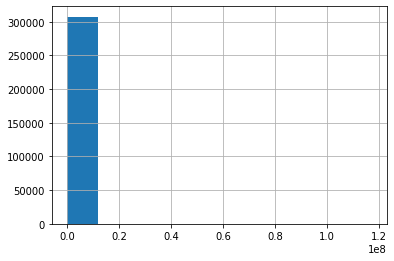

In [6]:
app_train['AMT_INCOME_TOTAL'].hist()

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 &lt;a list of 10 Patch objects&gt;)

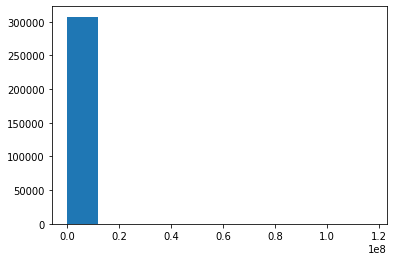

In [7]:
plt.hist(app_train['AMT_INCOME_TOTAL'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff155d2b0b8&gt;

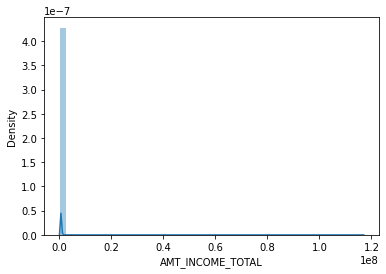

In [8]:
sns.distplot(app_train['AMT_INCOME_TOTAL'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff153c4a6a0&gt;

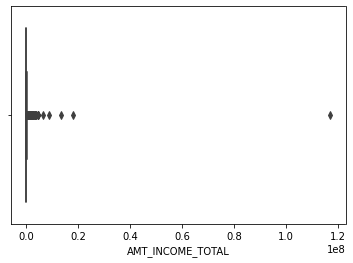

In [9]:
sns.boxplot(app_train['AMT_INCOME_TOTAL'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff153b8d9e8&gt;

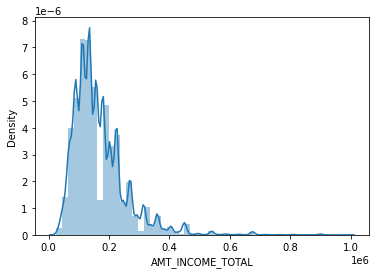

In [10]:
sns.distplot(app_train[app_train['AMT_INCOME_TOTAL'] <= 1000000]['AMT_INCOME_TOTAL'])

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff17554aa58&gt;

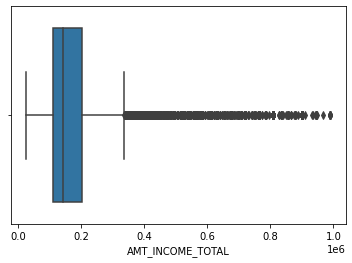

In [11]:
sns.boxplot(app_train[app_train['AMT_INCOME_TOTAL'] <= 1000000]['AMT_INCOME_TOTAL'])

(array([1.07232e+05, 1.32012e+05, 4.62030e+04, 1.57320e+04, 3.63400e+03,
        1.09300e+03, 8.67000e+02, 1.62000e+02, 1.24000e+02, 2.02000e+02]),
 array([ 25650., 122085., 218520., 314955., 411390., 507825., 604260.,
        700695., 797130., 893565., 990000.]),
 &lt;a list of 10 Patch objects&gt;)

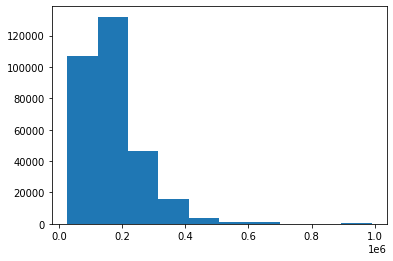

In [12]:
plt.hist(app_train[app_train['AMT_INCOME_TOTAL'] <= 1000000]['AMT_INCOME_TOTAL'])

#### TARGET 값에 따른 AMT_INCOME_TOTAL 값 분포도 비교
- plt.subplots()기반으로 seaborn의 distplot과 violin으로 분포도 비교 시각화

In [13]:
cond1 = app_train['TARGET'] == 1
cond0 = app_train['TARGET'] == 0
cond_amt = app_train['AMT_INCOME_TOTAL'] < 500000

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff1522b9320&gt;

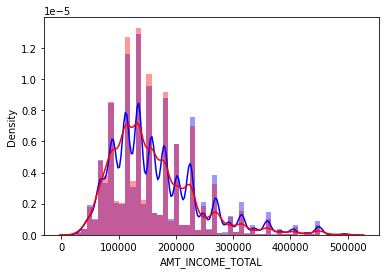

In [14]:
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label=0, color='blue')
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label=1, color='red')

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff1520646a0&gt;

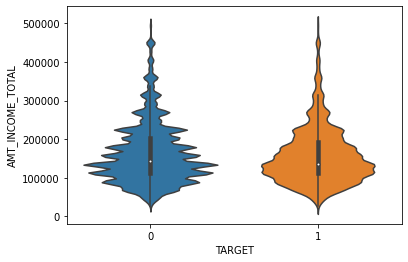

In [15]:
sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt])

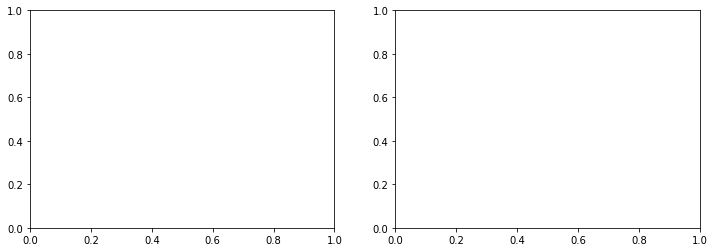

In [16]:
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7ff151f26588&gt;

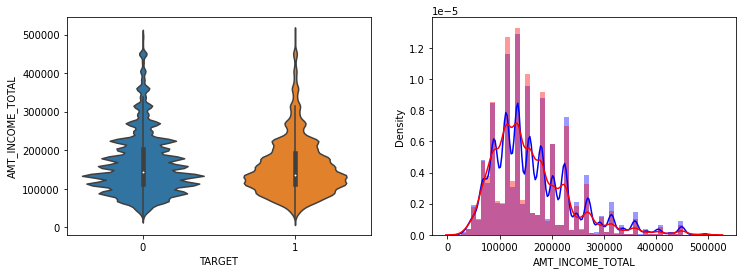

In [17]:

cond1 = app_train['TARGET'] == 1
cond0 = app_train['TARGET'] == 0
cond_amt = app_train['AMT_INCOME_TOTAL'] < 500000

fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)

sns.violinplot(x='TARGET', y='AMT_INCOME_TOTAL', data=app_train[cond_amt], ax=axes[0][0])
sns.distplot(app_train[cond0 & cond_amt]['AMT_INCOME_TOTAL'], label=0, color='blue', ax=axes[0][1])
sns.distplot(app_train[cond1 & cond_amt]['AMT_INCOME_TOTAL'], label=1, color='red', ax=axes[0][1])


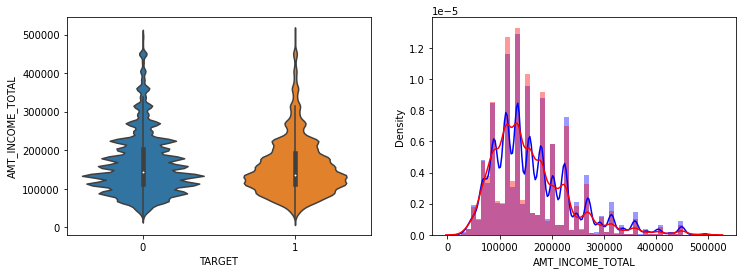

In [18]:
def show_column_hist_by_target(df, column, is_amt=False):
    cond1 = app_train['TARGET'] == 1
    cond0 = app_train['TARGET'] == 0
    cond_amt = app_train['AMT_INCOME_TOTAL'] < 500000

    fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=2, squeeze=False)

    # is_amt가 True이면 < 500000 조건으로 filtering
    cond_amt = True
    if is_amt:
        cond_amt = df[column] < 500000

    sns.violinplot(x='TARGET', y=column, data=app_train[cond_amt], ax=axes[0][0])
    sns.distplot(app_train[cond0 & cond_amt][column], label=0, color='blue')
    sns.distplot(app_train[cond1 & cond_amt][column], label=1, color='red')

show_column_hist_by_target(app_train, 'AMT_INCOME_TOTAL', is_amt=True)

#### app_train과 app_test를 합쳐서 한 번에 데이터 preprocessing 수행

#### Object feature들을 Label Encoding
- pandas factorize()이용

In [19]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [20]:
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [21]:
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

In [22]:
apps.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [23]:
object_columns = apps.dtypes[apps.dtypes=='object'].index.tolist()
object_columns

[&#39;CODE_GENDER&#39;,
 &#39;EMERGENCYSTATE_MODE&#39;,
 &#39;FLAG_OWN_CAR&#39;,
 &#39;FLAG_OWN_REALTY&#39;,
 &#39;FONDKAPREMONT_MODE&#39;,
 &#39;HOUSETYPE_MODE&#39;,
 &#39;NAME_CONTRACT_TYPE&#39;,
 &#39;NAME_EDUCATION_TYPE&#39;,
 &#39;NAME_FAMILY_STATUS&#39;,
 &#39;NAME_HOUSING_TYPE&#39;,
 &#39;NAME_INCOME_TYPE&#39;,
 &#39;NAME_TYPE_SUITE&#39;,
 &#39;OCCUPATION_TYPE&#39;,
 &#39;ORGANIZATION_TYPE&#39;,
 &#39;WALLSMATERIAL_MODE&#39;,
 &#39;WEEKDAY_APPR_PROCESS_START&#39;]

In [29]:
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]

In [30]:
apps['CODE_GENDER'].value_counts(dropna=False)

1    235126
0    121125
2         4
Name: CODE_GENDER, dtype: int64

In [31]:
apps.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(41), object(15)
memory usage: 334.3+ MB


In [32]:
object_columns = apps.dtypes[apps.dtypes=='object'].index.tolist()

for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [33]:
apps.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


#### NULL값 일괄변환

In [40]:
apps.isnull().sum().sort_values(ascending=False)[0:100]

COMMONAREA_AVG                  248360
COMMONAREA_MEDI                 248360
COMMONAREA_MODE                 248360
NONLIVINGAPARTMENTS_MODE        246861
NONLIVINGAPARTMENTS_MEDI        246861
NONLIVINGAPARTMENTS_AVG         246861
LIVINGAPARTMENTS_AVG            242979
LIVINGAPARTMENTS_MODE           242979
LIVINGAPARTMENTS_MEDI           242979
FLOORSMIN_MODE                  241108
FLOORSMIN_MEDI                  241108
FLOORSMIN_AVG                   241108
YEARS_BUILD_MEDI                236306
YEARS_BUILD_AVG                 236306
YEARS_BUILD_MODE                236306
OWN_CAR_AGE                     235241
LANDAREA_MODE                   210844
LANDAREA_MEDI                   210844
LANDAREA_AVG                    210844
BASEMENTAREA_MEDI               207584
BASEMENTAREA_MODE               207584
BASEMENTAREA_AVG                207584
NONLIVINGAREA_MODE              195766
NONLIVINGAREA_MEDI              195766
NONLIVINGAREA_AVG               195766
EXT_SOURCE_1             

In [41]:
# -999로 모든 컬럼들의 NULL값 변환
apps = apps.fillna(-999)

In [42]:
apps.isnull().sum().sort_values(ascending=False)[0:100]

YEARS_BUILD_MODE                0
ELEVATORS_MEDI                  0
EMERGENCYSTATE_MODE             0
ENTRANCES_AVG                   0
ENTRANCES_MEDI                  0
ENTRANCES_MODE                  0
EXT_SOURCE_1                    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
FLAG_CONT_MOBILE                0
FLAG_DOCUMENT_10                0
FLAG_DOCUMENT_11                0
FLAG_DOCUMENT_12                0
FLAG_DOCUMENT_13                0
FLAG_DOCUMENT_14                0
FLAG_DOCUMENT_15                0
FLAG_DOCUMENT_16                0
FLAG_DOCUMENT_17                0
FLAG_DOCUMENT_18                0
FLAG_DOCUMENT_19                0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_20                0
FLAG_DOCUMENT_21                0
FLAG_DOCUMENT_3                 0
FLAG_DOCUMENT_4                 0
FLAG_DOCUMENT_5                 0
FLAG_DOCUMENT_6                 0
FLAG_DOCUMENT_7                 0
FLAG_DOCUMENT_8                 0
ELEVATORS_MODE

#### 학습 데이터와 테스트 데이터 분리

In [43]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == 999]

app_train.shape, app_test.shape

((307511, 122), (0, 122))